<a href="https://colab.research.google.com/github/Sohanchandra123/Predicting-Inorganic-Nitrogen-in-soil/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import math
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
df=pd.read_excel('/content/drive/MyDrive/Trained data Final.xlsx',index_col='Plantation Day',parse_dates=True)
df


,Initial N Rate,Other N,DTTD,SRAD,TMX,TMIN,N Uptake,Inorganic N
Plantation Day,,,,,,,,
2000-01-01,50.000000,135.00000,20.31,22.000000,34.000000,20.000000,0.0000,80.460000
2000-01-02,50.000000,135.00000,17.00,13.000000,30.000000,19.000000,0.0000,85.061250
2000-01-03,50.000000,135.00000,17.53,22.000000,30.000000,19.000000,0.0000,86.355000
2000-01-04,50.000000,135.00000,19.72,22.000000,33.000000,20.000000,0.0000,87.367500
2000-01-05,50.000000,135.00000,19.00,20.000000,32.000000,20.000000,0.0000,89.872500
...,...,...,...,...,...,...,...,...
2001-10-17,224.170231,118.22738,15.35,14.987088,22.666667,14.388889,3.4668,199.029540
2001-10-18,224.170231,118.22738,7.55,10.572968,18.388889,10.000000,19.7225,184.805939
2001-10-19,224.170231,118.22738,19.30,28.049536,27.722222,13.722222,53.0738,222.533789


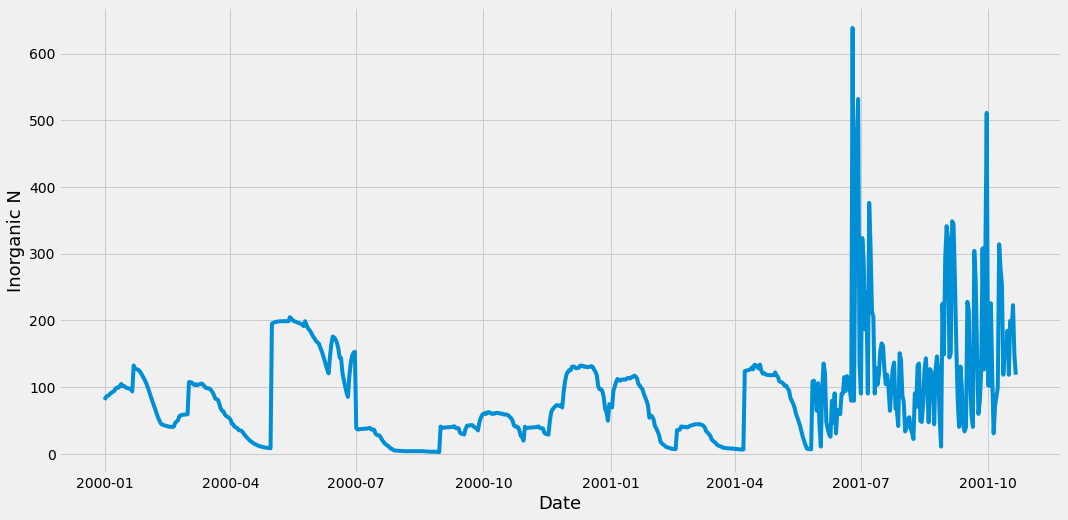

In [ ]:
#visualizing N content
plt.figure(figsize=(16,8))
plt.plot(df['Inorganic N'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Inorganic N',fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Inorganic N'])
dataset = data.values
training_data_len = math.ceil(len(dataset)* .8)
training_data_len


528

In [ ]:
#scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[1.23020768e-01],
       [1.30253773e-01],
       [1.32287503e-01],
       [1.33879118e-01],
       [1.37816891e-01],
       [1.39726829e-01],
       [1.42302887e-01],
       [1.44277668e-01],
       [1.50372964e-01],
       [1.51970474e-01],
       [1.51870261e-01],
       [1.55501501e-01],
       [1.60736145e-01],
       [1.55495606e-01],
       [1.56144041e-01],
       [1.53055130e-01],
       [1.51186456e-01],
       [1.50502651e-01],
       [1.49642000e-01],
       [1.48003226e-01],
       [1.43081010e-01],
       [2.04252074e-01],
       [1.96258630e-01],
       [1.95486402e-01],
       [1.94572698e-01],
       [1.91813899e-01],
       [1.87746438e-01],
       [1.81651143e-01],
       [1.76039227e-01],
       [1.70079514e-01],
       [1.63076408e-01],
       [1.54122101e-01],
       [1.45409483e-01],
       [1.34798718e-01],
       [1.25172395e-01],
       [1.15599127e-01],
       [1.06185020e-01],
       [9.72307125e-02],
       [8.73980696e-02],
       [7.85086060e-02],


In [ ]:
#creating training data set
train_data = scaled_data[0:training_data_len,:]
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=31:
    print(x_train)
    print(y_train)
    print()




In [ ]:
#convert x_train and y_train to numpy arrays
x_train,y_train =np.array(x_train),np.array(y_train)

#reshaping
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(468, 60, 1)

In [ ]:
#build LSTM
model=Sequential()
model.add(LSTM(100, return_sequences=True,input_shape=(x_train.shape[1],1),activation='relu'))
model.add(LSTM(100, return_sequences=False))
model.add(Dense(50))
model.add(Dense(1))

In [ ]:
from keras.layers.serialization import activation
model.compile(optimizer='adam',loss='mean_squared_error')

In [ ]:
model.fit(x_train,y_train,batch_size=5,epochs=10)

Epoch 1/10
94/94 [==============================] - 11s 74ms/step - loss: 0.0039
Epoch 2/10
94/94 [==============================] - 8s 90ms/step - loss: 0.0016
Epoch 3/10
94/94 [==============================] - 7s 74ms/step - loss: 0.0017
Epoch 4/10
94/94 [==============================] - 9s 91ms/step - loss: 0.0013
Epoch 5/10
94/94 [==============================] - 7s 76ms/step - loss: 0.0012
Epoch 6/10
94/94 [==============================] - 9s 92ms/step - loss: 0.0011
Epoch 7/10
94/94 [==============================] - 7s 74ms/step - loss: 0.0010
Epoch 8/10
94/94 [==============================] - 8s 90ms/step - loss: 9.7632e-04
Epoch 9/10
94/94 [==============================] - 7s 74ms/step - loss: 8.5807e-04
Epoch 10/10
94/94 [==============================] - 9s 96ms/step - loss: 8.0122e-04


In [ ]:
#create the testing dataset
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test =dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i,0])



In [ ]:
#convert data to numpy
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1],1))

In [ ]:
#get predicted values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)


5/5 [==============================] - 1s 29ms/step


In [ ]:
#getting rmse
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

3.644231907800477

<ipython-input-15-c8c62c16733b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predicitons']= predictions


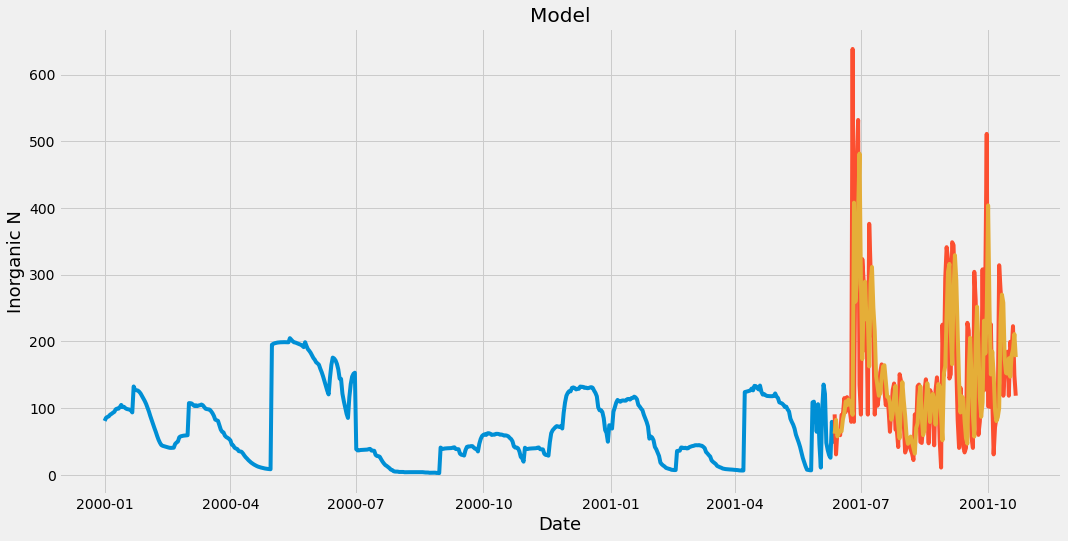

In [ ]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predicitons']= predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Inorganic N',fontsize=18)
plt.plot(train['Inorganic N'])
plt.plot(valid[['Inorganic N','Predicitons']])
plt.show()

In [ ]:
valid

,Inorganic N,Predicitons
Plantation Day,,
2001-06-12,90.284561,61.289352
2001-06-13,30.262981,82.051025
2001-06-14,65.569793,57.281517
2001-06-15,64.056644,61.520443
2001-06-16,59.012813,66.051003
...,...,...
2001-10-17,199.029540,146.792679
2001-10-18,184.805939,178.327042
2001-10-19,222.533789,187.471390


In [ ]:
#future predictions
Inorganic_N_Future=pd.read_excel('/content/drive/MyDrive/Trained data.xlsx',index_col='Plantation Day',parse_dates=True)
new_df=Inorganic_N_Future.filter(['Inorganic N'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test=np.array(x_test[-60:])
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred_future=model.predict(X_test).reshape(-1,1)
pred_future = scaler.inverse_transform(pred_future)
print(pred_future)



2/2 [==============================] - 0s 98ms/step
[[111.27612 ]
 [ 74.85895 ]
 [104.87468 ]
 [135.70976 ]
 [131.75258 ]
 [ 87.568   ]
 [ 51.46575 ]
 [151.91687 ]
 [162.53964 ]
 [239.87492 ]
 [304.12592 ]
 [315.9348  ]
 [214.60652 ]
 [165.52881 ]
 [272.0468  ]
 [329.0688  ]
 [291.12234 ]
 [211.80547 ]
 [139.90173 ]
 [ 93.0801  ]
 [117.24089 ]
 [114.55622 ]
 [ 80.18903 ]
 [ 54.625603]
 [ 46.397026]
 [155.63393 ]
 [205.15933 ]
 [149.34665 ]
 [ 90.022736]
 [ 56.964615]
 [198.34686 ]
 [251.70192 ]
 [192.81804 ]
 [115.91347 ]
 [ 86.5667  ]
 [108.409615]
 [230.76263 ]
 [181.59853 ]
 [242.22887 ]
 [403.7185  ]
 [250.97662 ]
 [150.16667 ]
 [184.50882 ]
 [150.8964  ]
 [ 97.43312 ]
 [ 80.188354]
 [ 86.20055 ]
 [ 99.56751 ]
 [228.56126 ]
 [269.8623  ]
 [257.60904 ]
 [172.70857 ]
 [152.32146 ]
 [151.29547 ]
 [174.3883  ]
 [146.79268 ]
 [178.32704 ]
 [187.47139 ]
 [210.70595 ]
 [176.19086 ]]


In [ ]:
df_past = df[['Inorganic N']].reset_index()
df_past.rename(columns={'index': 'Plantation Day', 'Inorganic N': 'Actual'}, inplace=True)
df_past['Plantation Day'] = pd.to_datetime(df_past['Plantation Day'])
df_past['Forecast'] = np.nan
df_past['Forecast'].iloc[-1] = df_past['Actual'].iloc[-1]

df_future = pd.DataFrame(columns=['Plantation Day', 'Actual', 'Forecast'])
df_future['Plantation Day'] = pd.date_range(start=df_past['Plantation Day'].iloc[-1] + pd.Timedelta(days=1), periods=60)
df_future['Forecast'] = pred_future.flatten()
df_future['Actual'] = np.nan
results=df_past.append(df_future).set_index('Plantation Day')

/usr/local/lib/python3.8/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


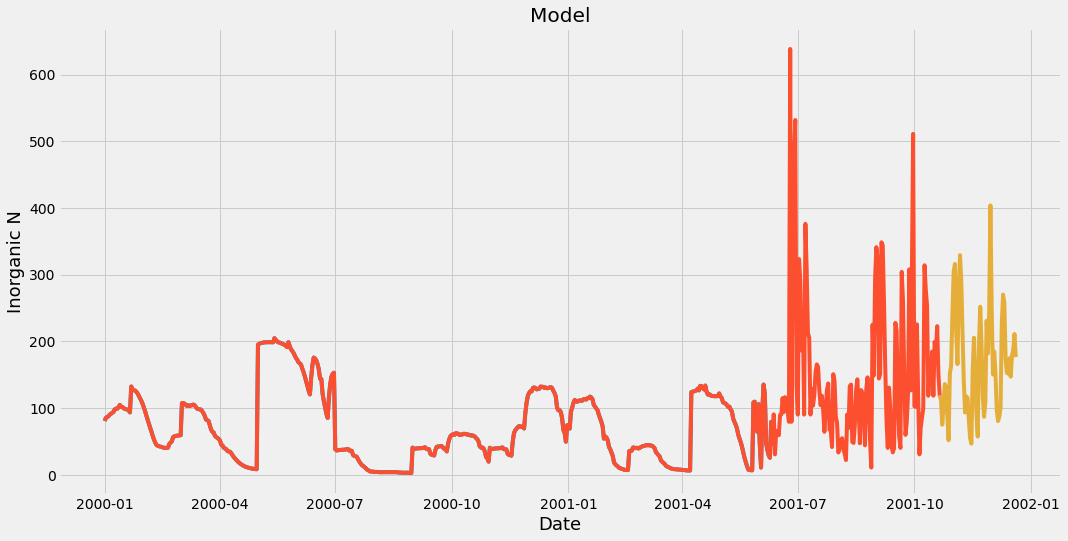

In [ ]:
#plot the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Inorganic N',fontsize=18)
plt.plot(train['Inorganic N'])
plt.plot(results)
plt.show()

In [ ]:
print(results[-30:])

                Actual    Forecast
Plantation Day                    
2001-11-21         NaN  198.346863
2001-11-22         NaN  251.701920
2001-11-23         NaN  192.818039
2001-11-24         NaN  115.913467
2001-11-25         NaN   86.566704
2001-11-26         NaN  108.409615
2001-11-27         NaN  230.762634
2001-11-28         NaN  181.598526
2001-11-29         NaN  242.228867
2001-11-30         NaN  403.718506
2001-12-01         NaN  250.976624
2001-12-02         NaN  150.166672
2001-12-03         NaN  184.508820
2001-12-04         NaN  150.896393
2001-12-05         NaN   97.433121
2001-12-06         NaN   80.188354
2001-12-07         NaN   86.200546
2001-12-08         NaN   99.567513
2001-12-09         NaN  228.561264
2001-12-10         NaN  269.862305
2001-12-11         NaN  257.609039
2001-12-12         NaN  172.708572
2001-12-13         NaN  152.321457
2001-12-14         NaN  151.295471
2001-12-15         NaN  174.388306
2001-12-16         NaN  146.792679
2001-12-17         N